In [1]:
from keras.models import load_model
import h5py
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Conv2D, Dropout, Cropping2D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D

import csv
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
samples = []

FOLDER = 'data_edge'
with open(FOLDER + '/driving_log.csv') as csvFile:
    reader = csv.reader(csvFile)
    for index, line in enumerate(reader):
        if index == 0:
            continue
        samples.append(line)
        
        
samples = samples[:500]
        
def load_image(img_path, folder):
    img_file = folder + '/IMG/' + img_path.split('/')[-1]
    img = cv2.imread(img_file)
    # Drive.py reads the sim images with RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def resize(x):
    # https://discussions.udacity.com/t/keras-lambda-to-resize-seems-causing-the-problem/316247/2
    from keras.backend import tf as ktf
    return ktf.image.resize_images(x, (80, 160))

images = []
for line in samples:
    image = load_image(line[0], FOLDER)
    images.append(image)

X_train = np.array(images)

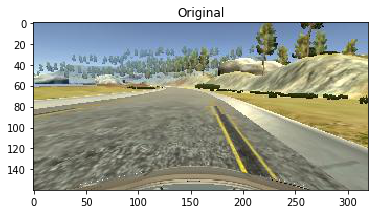

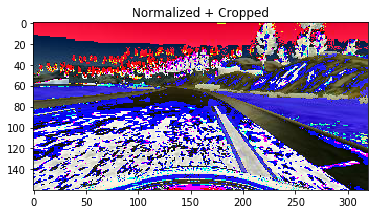

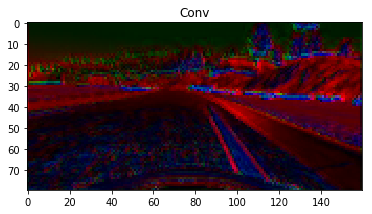

In [10]:
# https://discussions.udacity.com/t/how-to-visualize-the-result-of-pre-processing-when-using-keras/241527/4
model = Sequential()
# Normalization
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160, 320, 3)))
# # Crop image
# model.add(Cropping2D(cropping=((40, 25), (0, 0))))
# # # Resize image
# model.add(Lambda(resize))
norm = model.predict(X_train)

model.add(Conv2D(3, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
conv = model.predict(X_train)

preview_index = 200
img_plot = plt.imshow(X_train[preview_index])
plt.title('Original')
plt.show()

img_plot = plt.imshow(norm[preview_index])
plt.title('Normalized + Cropped')
plt.show()

img_plot = plt.imshow(conv[preview_index])
plt.title('Conv')
plt.show()

In [40]:
# model = load_model('simple_model.h5')